# Hyperparameters and Model Validation

Basic steps for applying a supervised machine learning model:

1. Choose model
2. Choose model hyperparameters
3. Fit the model to the training data
4. Use the model to predict labels for new data

In [123]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data[:,:2]
y = iris.target

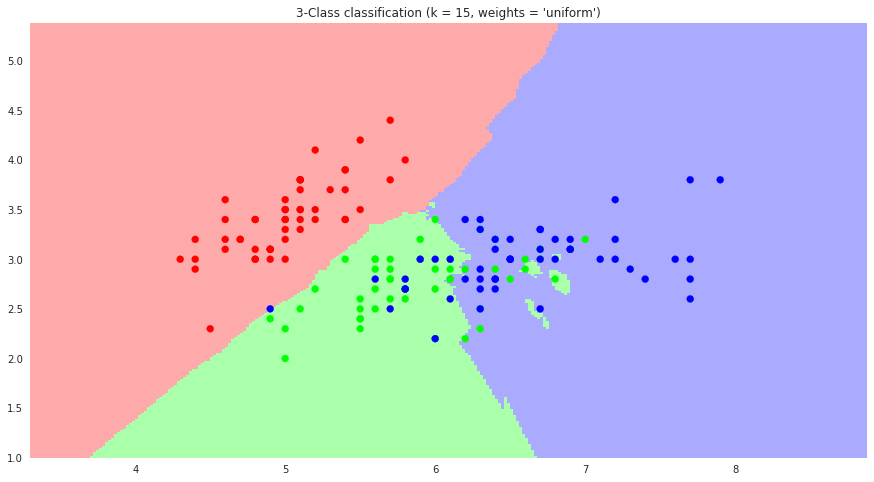

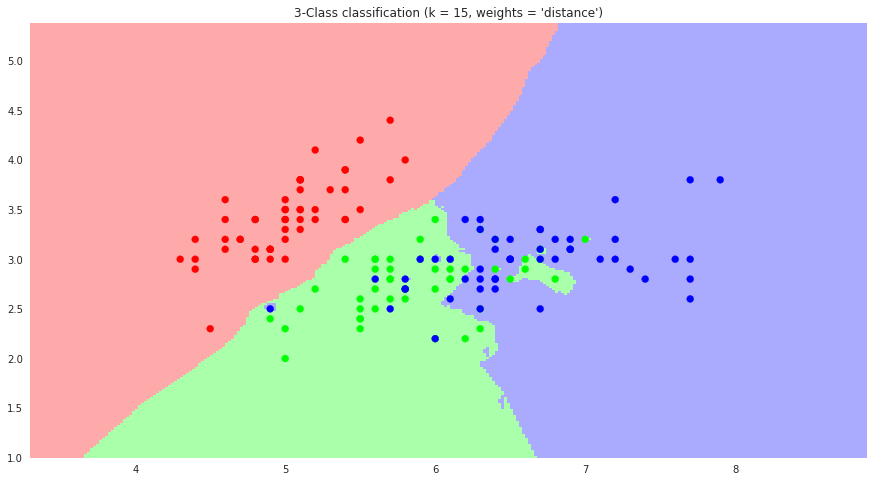

In [130]:
from matplotlib.colors import ListedColormap
h = .02  # step size in the mesh
n=15

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])

cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for weights in ['uniform', 'distance']:
    clf = KNeighborsClassifier(n_neighbors=n, weights=weights)
    clf.fit(X, y)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(15,8))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n, weights))

plt.show()

In [126]:
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

X1, X2, y1, y2 = train_test_split(X, y, random_state=0,
                                  train_size=0.7)
model=KNeighborsClassifier(n_neighbors=10)
model.fit(X1, y1)

y2_model = model.predict(X2)
accuracy_score(y2, y2_model)

0.73333333333333328

In [127]:
from sklearn.cross_validation import cross_val_score
cross_val_score(model, X, y, cv=10).mean()

0.76666666666666672

Repeating the validation across different subsets of the data gives us an even better idea of the performance of the algorithm.

Scikit-Learn implements a number of useful cross-validation schemes that are implemented via iterators in the ``cross_validation`` module.

For example, __LeaveOneOut:(really extrme case: all used for training leaving only one for testing)__

In [23]:
from sklearn.cross_validation import LeaveOneOut
scores = cross_val_score(model, X, y, cv=LeaveOneOut(len(X)))
scores

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  0.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [9]:
scores.mean()

0.95999999999999996

take a look at Scikit-Learn's online [cross-validation documentation](http://scikit-learn.org/stable/modules/cross_validation.html).

## Selecting the Best Model
> if our estimator is underperforming, how should we move forward?


There are several possible answers:

- Use a more complicated/more flexible model
- Use a less complicated/less flexible model
- Gather more training samples
- Gather more data to add features to each sample

In particular, sometimes using a more complicated model will give worse results, and adding more training samples may not improve your results.

### The Bias-variance trade-off

Fundamentally, the question of "the best model" is about finding a balanced spot in the tradeoff between *bias* and *variance*.



- For high-bias models, the performance of the model on the validation set is similar to the performance on the training set.
- For high-variance models, the performance of the model on the validation set is far worse than the performance on the training set.

In [24]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

In [133]:
import numpy as np

def make_data(N, err=1.0, seed=1):
    X = np.random.RandomState(seed).rand(N, 1) ** 2
    y = 10 - 1. / (X.ravel() + 0.1) 
    if err > 0:
        y += err * np.random.RandomState(seed).randn(N) # add noise
    return X, y

X, y = make_data(40)

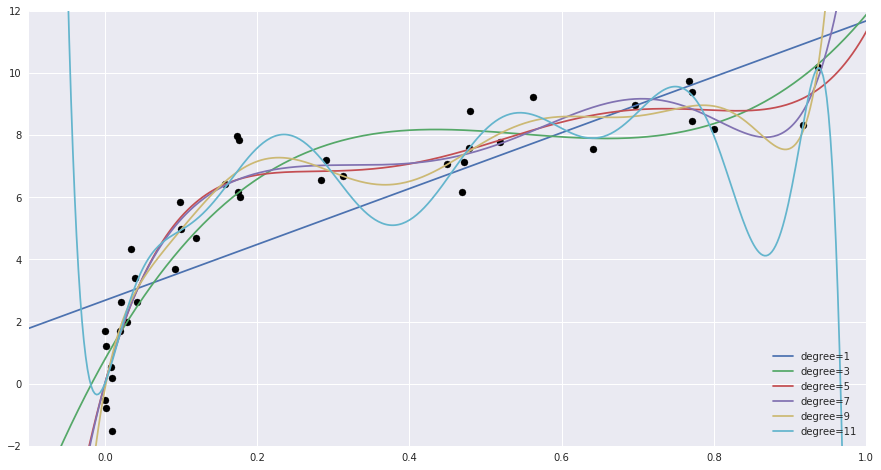

In [134]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  
fig=plt.figure(figsize=(15,8))

X_test = np.linspace(-0.1, 1.1, 500)[:, None]

fig = plt.figure(figsize=(15, 8))

plt.scatter(X.ravel(), y, color='black')

axis = plt.axis()

for degree in [1, 3, 5, 7, 9, 11]:
    y_test = PolynomialRegression(degree).fit(X, y).predict(X_test)
    plt.plot(X_test.ravel(), y_test, label='degree={0}'.format(degree))
    
    
plt.xlim(-0.1, 1.0)
plt.ylim(-2, 12)
plt.legend(loc='lower right');

>  what degree of polynomial provides a suitable trade-off between bias (under-fitting) and variance (over-fitting)?



Text(0.5,1,'High-variance model: Overfits the data')

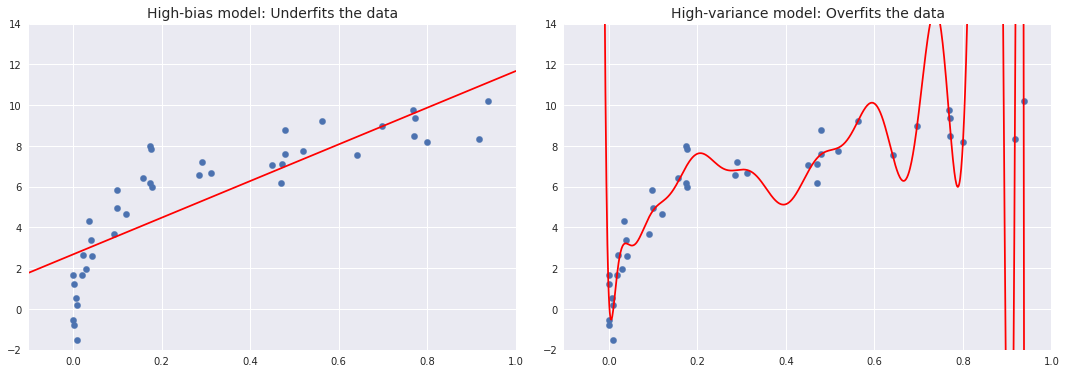

In [136]:
xfit = np.linspace(-0.1, 1.0, 1000)[:, None]
model1 = PolynomialRegression(1).fit(X, y)
model20 = PolynomialRegression(20).fit(X, y)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

ax[0].scatter(X.ravel(), y, s=40)
ax[0].plot(xfit.ravel(), model1.predict(xfit), color='red')
ax[0].axis([-0.1, 1.0, -2, 14])
ax[0].set_title('High-bias model: Underfits the data', size=14)

ax[1].scatter(X.ravel(), y, s=40)
ax[1].plot(xfit.ravel(), model20.predict(xfit), color='red')
ax[1].axis([-0.1, 1.0, -2, 14])
ax[1].set_title('High-variance model: Overfits the data', size=14)

We can make further progress in this by visualizing the validation curve for this particular data and model

this can be done straightforwardly using the ``validation_curve`` convenience routine provided by Scikit-Learn.


Given a model, data, parameter name, and a range to explore, this function will automatically compute both the training score and validation score across the range:

Text(0.5,1,'Validation Curve Schematic')

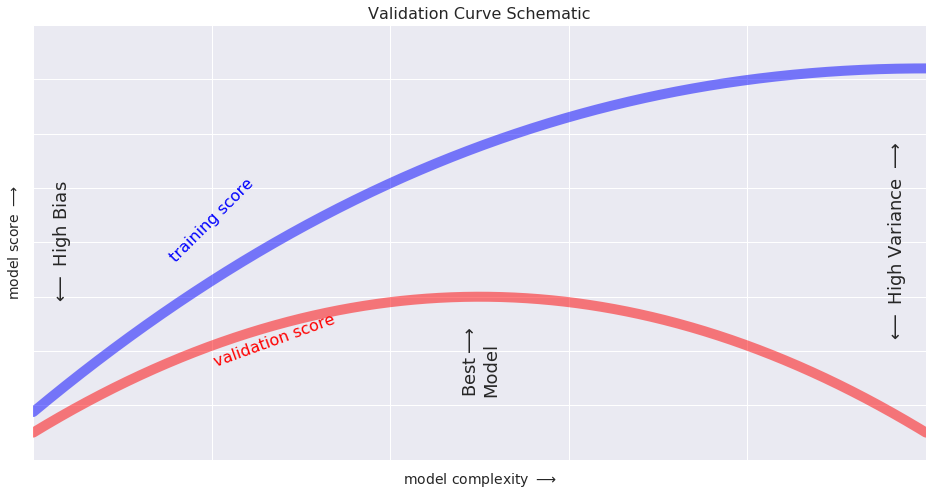

In [150]:
x = np.linspace(0, 1, 1000)
y1 = -(x - 0.5) ** 2
y2 = y1 - 0.33 + np.exp(x - 1)

fig, ax = plt.subplots(figsize=(16,8))
ax.plot(x, y2, lw=10, alpha=0.5, color='blue')
ax.plot(x, y1, lw=10, alpha=0.5, color='red')

ax.text(0.15, 0.2, "training score", rotation=45, size=16, color='blue')
ax.text(0.2, -0.05, "validation score", rotation=20, size=16, color='red')

ax.text(0.02, 0.1, r'$\longleftarrow$ High Bias', size=18, rotation=90, va='center')
ax.text(0.98, 0.1, r'$\longleftarrow$ High Variance $\longrightarrow$', size=18, rotation=90, ha='right', va='center')
ax.text(0.48, -0.12, 'Best$\\longrightarrow$\nModel', size=18, rotation=90, va='center')

ax.set_xlim(0, 1)
ax.set_ylim(-0.3, 0.5)

ax.set_xlabel(r'model complexity $\longrightarrow$', size=14)
ax.set_ylabel(r'model score $\longrightarrow$', size=14)

ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.yaxis.set_major_formatter(plt.NullFormatter())

ax.set_title("Validation Curve Schematic", size=16)

Text(0.5,1,'Learning Curve Schematic')

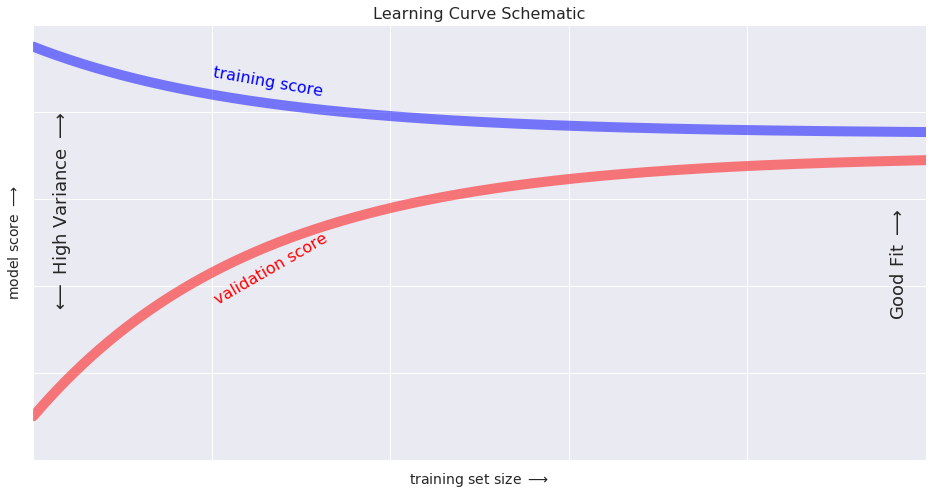

In [157]:
N = np.linspace(0, 1, 1000)
y1 = 0.75 + 0.2 * np.exp(-4 * N)
y2 = 0.7 - 0.6 * np.exp(-4 * N)

fig, ax = plt.subplots(figsize=(16,8))
ax.plot(x, y1, lw=10, alpha=0.5, color='blue')
ax.plot(x, y2, lw=10, alpha=0.5, color='red')

ax.text(0.2, 0.88, "training score", rotation=-10, size=16, color='blue')
ax.text(0.2, 0.5, "validation score", rotation=30, size=16, color='red')

ax.text(0.98, 0.45, r'Good Fit $\longrightarrow$', size=18, rotation=90, ha='right', va='center')
ax.text(0.02, 0.57, r'$\longleftarrow$ High Variance $\longrightarrow$', size=18, rotation=90, va='center')

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

ax.set_xlabel(r'training set size $\longrightarrow$', size=14)
ax.set_ylabel(r'model score $\longrightarrow$', size=14)

ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.yaxis.set_major_formatter(plt.NullFormatter())

ax.set_title("Learning Curve Schematic", size=16)

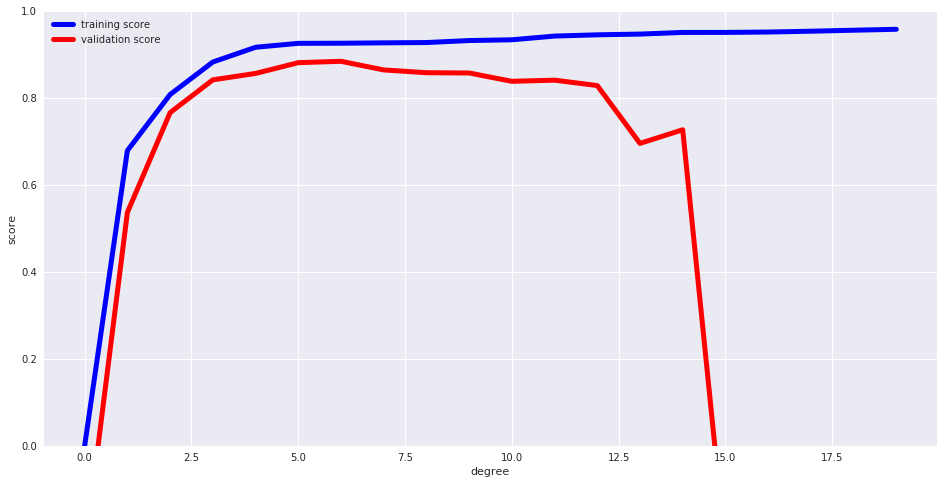

In [155]:
from sklearn.learning_curve import validation_curve
fig=plt.figure(figsize=(16,8))
degree = np.arange(0, 20)
train_score, val_score = validation_curve(PolynomialRegression(), X, y,
                                          'polynomialfeatures__degree', degree, cv=10)

plt.plot(degree, np.median(train_score, 1), color='blue', label='training score', linewidth=5)
plt.plot(degree, np.median(val_score, 1), color='red', label='validation score', linewidth=5)
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');

This shows the training score is everywhere higher than the validation score; 

- the training score is monotonically improving with increased model complexity; 
- and the validation score reaches a maximum before dropping off as the model becomes over-fit.

From the validation curve, we can read-off that the optimal trade-off between bias and variance is found for probably 4th ~ 6th-order polynomial; we can compute and display this fit over the original data as follows:

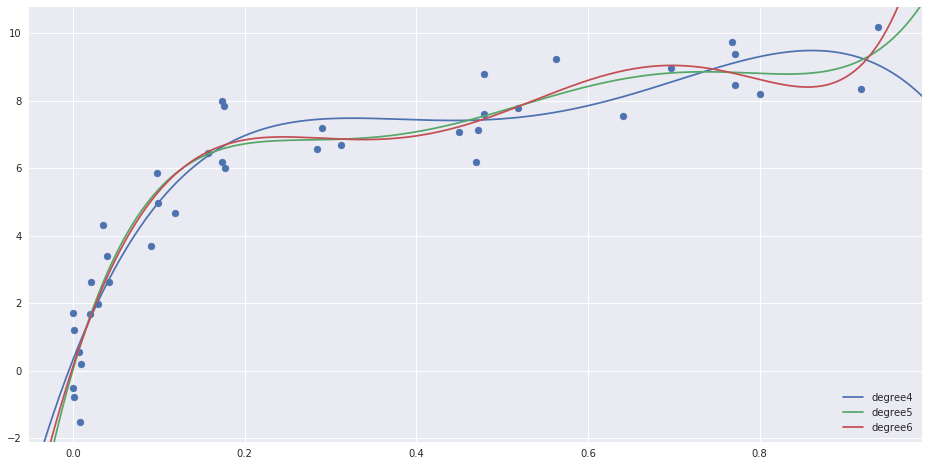

In [156]:
fig=plt.figure(figsize=(16,8))
plt.scatter(X.ravel(), y)
lim = plt.axis()
for i in range(4,7):
    y_test = PolynomialRegression(i).fit(X, y).predict(X_test)
    plt.plot(X_test.ravel(), y_test, label="degree{}".format(i));
plt.axis(lim);
plt.legend(loc='lower right')

Text(0.02,0.91,'validation score: $R^2$ = -2.3')

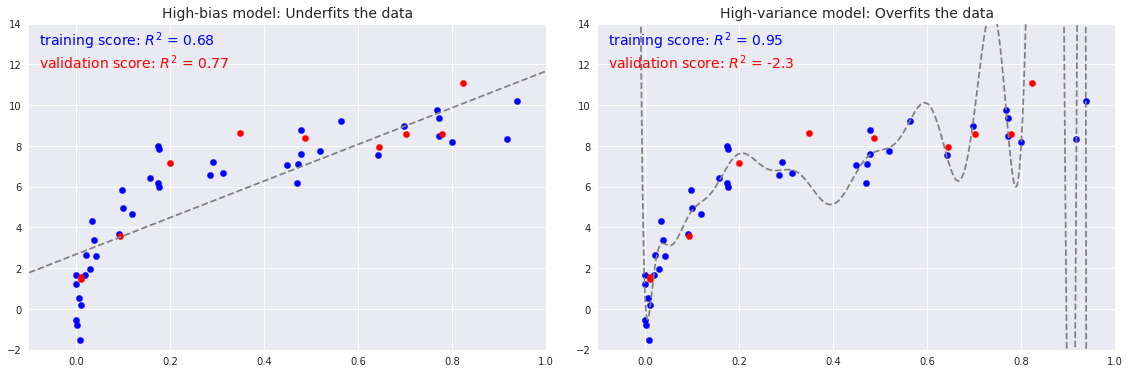

In [148]:
fig, ax = plt.subplots(1, 2, figsize=(17, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

X2, y2 = make_data(10, seed=2018)

ax[0].scatter(X.ravel(), y, s=40, c='blue')
ax[0].plot(xfit.ravel(), model1.predict(xfit), color='gray', linestyle='--')
ax[0].axis([-0.1, 1.0, -2, 14])
ax[0].set_title('High-bias model: Underfits the data', size=14)
ax[0].scatter(X2.ravel(), y2, s=40, c='red')
ax[0].text(0.02, 0.98, "training score: $R^2$ = {0:.2f}".format(model1.score(X, y)),
           ha='left', va='top', transform=ax[0].transAxes, size=14, color='blue')
ax[0].text(0.02, 0.91, "validation score: $R^2$ = {0:.2f}".format(model1.score(X2, y2)),
           ha='left', va='top', transform=ax[0].transAxes, size=14, color='red')

ax[1].scatter(X.ravel(), y, s=40, c='blue')
ax[1].plot(xfit.ravel(), model20.predict(xfit), color='gray', linestyle='--')
ax[1].axis([-0.1, 1.0, -2, 14])
ax[1].set_title('High-variance model: Overfits the data', size=14)
ax[1].scatter(X2.ravel(), y2, s=40, c='red')
ax[1].text(0.02, 0.98, "training score: $R^2$ = {0:.2g}".format(model20.score(X, y)),
           ha='left', va='top', transform=ax[1].transAxes, size=14, color='blue')
ax[1].text(0.02, 0.91, "validation score: $R^2$ = {0:.2g}".format(model20.score(X2, y2)),
           ha='left', va='top', transform=ax[1].transAxes, size=14, color='red') 
# The use of transform=ax.transAxes throughout the code indicates that the coordinates are given relative 
# to the axes bounding box, with 0,0 being the lower left of the axes and 1,1 the upper right.

## Learning Curves

One important aspect of model complexity is that the optimal model will generally depend on the size of your training data.

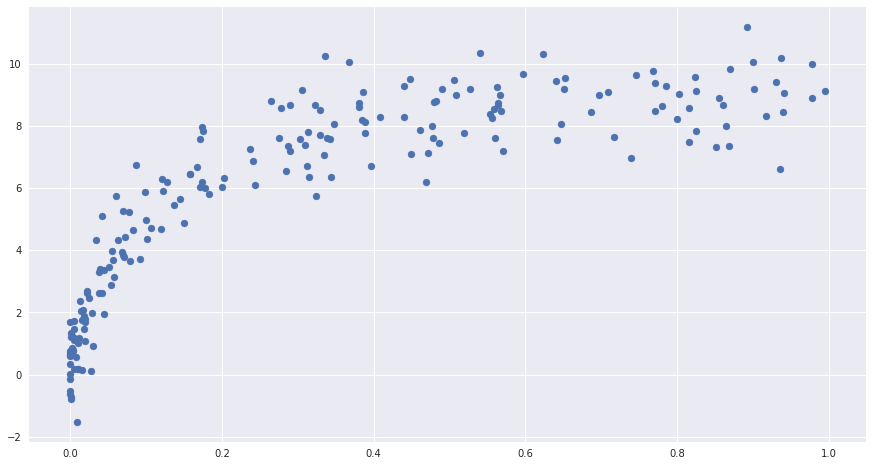

In [73]:
X2, y2 = make_data(200)
fig=plt.figure(figsize=(15,8))
plt.scatter(X2.ravel(), y2);

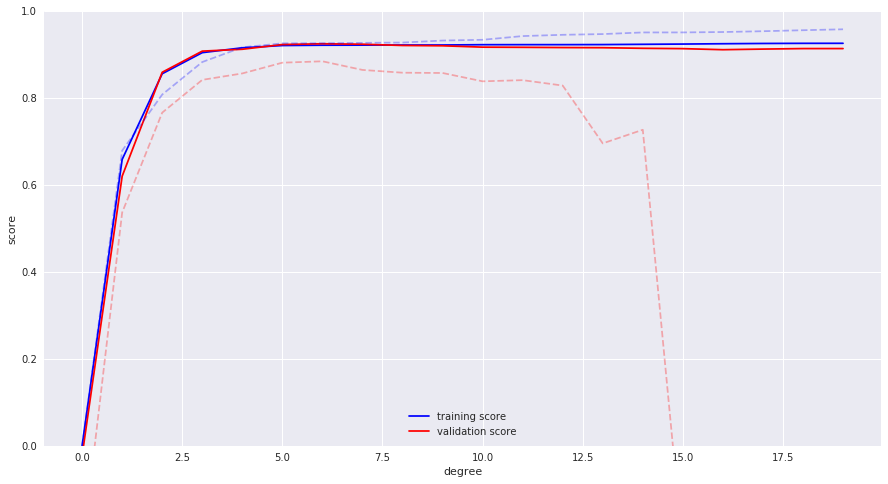

In [77]:
fig=plt.figure(figsize=(15,8))
degree = np.arange(20)
train_score2, val_score2 = validation_curve(PolynomialRegression(), X2, y2,
                                            'polynomialfeatures__degree', degree, cv=10)

plt.plot(degree, np.median(train_score2, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score2, 1), color='red', label='validation score')
plt.plot(degree, np.median(train_score, 1), color='blue', alpha=0.3, linestyle='dashed')
plt.plot(degree, np.median(val_score, 1), color='red', alpha=0.3, linestyle='dashed')
plt.legend(loc='lower center')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');

It is clear from the validation curve that the larger dataset can support a much more complicated model: 

- the peak here is probably around a degree of 6
- but even a degree-20 model is not seriously over-fitting the data
    - the validation and training scores remain very close.

Thus we see that the behavior of the validation curve has two important inputs: the model complexity and the number of training points.

It is often useful to to explore the behavior of the model as a function of the number of training points, which we can do by using increasingly larger subsets of the data to fit our model.

The general behavior we would expect from a learning curve is this:

- A model of a given complexity will *overfit* a small dataset: this means the training score will be relatively high, while the validation score will be relatively low.
- A model of a given complexity will *underfit* a large dataset: this means that the training score will decrease, but the validation score will increase.
- __(Attention!!!)__ A model will never, except by chance, give a better score to the validation set than the training set: this means the curves should keep getting closer together but never cross.



__In particular, once you have enough points that a particular model has converged, *adding more training data will not help!*__

The only way to increase model performance in this case is to use another _(often more complex)_ model.

### Learning curves in Scikit-Learn

Scikit-Learn offers a convenient utility for computing such learning curves from your models; here we will compute a learning curve for our original dataset with a second-order polynomial model and a ninth-order polynomial:

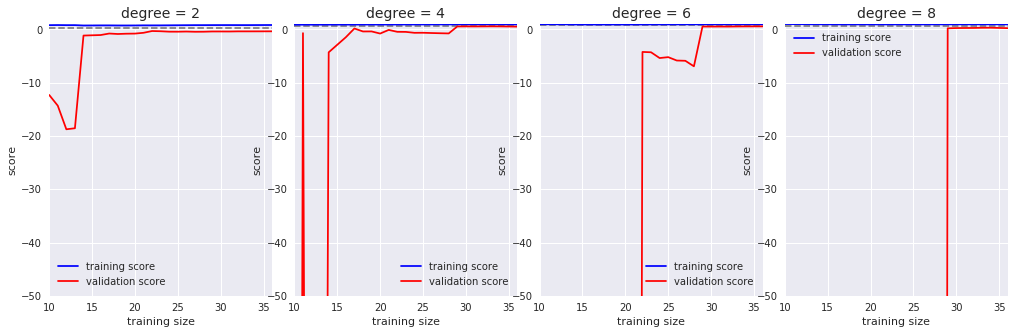

In [106]:
from sklearn.learning_curve import learning_curve

fig, ax = plt.subplots(1, 4, figsize=(15, 5))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for i, degree in enumerate([2,4,6,8]):
    N, train_lc, val_lc = learning_curve(PolynomialRegression(degree),
                                         X, y, 
                                         cv=10,
                                         train_sizes=np.linspace(0.3, 1, 25))

    ax[i].plot(N, np.mean(train_lc, 1), color='blue', label='training score')
    ax[i].plot(N, np.mean(val_lc, 1), color='red', label='validation score')
    ax[i].hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1],
                 color='gray', linestyle='dashed')

    ax[i].set_ylim(-50, 1)
    ax[i].set_xlim(N[0], N[-1])
    ax[i].set_xlabel('training size')
    ax[i].set_ylabel('score')
    ax[i].set_title('degree = {0}'.format(degree), size=14)
    ax[i].legend(loc='best')

The diagnostics above gives us a visual depiction of how our model responds to increasing training data.


In particular, when your learning curve has already converged (i.e., when the training and validation curves are already close to each other) *adding more training data will not significantly improve the fit*

This situation is seen in the first panel, with the learning curve for the degree-2 model.

By moving to a much more complicated model, we increase the score of convergence (indicated by the dashed line), but at the expense of higher model variance _(indicated by the difference between the training and validation scores)_.

If we were to add even more data points, the learning curve for the more complicated model would eventually converge.

__Plotting a learning curve for your particular choice of model and dataset can help you to make this type of decision about how to move forward in improving your analysis.__

## Validation in Practice: Grid Search

In practice, models generally have more than one knob to turn, and thus plots of validation and learning curves change from lines to multi-dimensional surfaces.

> Solutions?

In these cases, such visualizations are difficult and we would rather simply find the particular model that maximizes the validation score.

Scikit-Learn provides automated tools to do this in the grid search module.


- Using grid search:
    - This can be set up using Scikit-Learn's ``GridSearchCV`` meta-estimator:

In [108]:
from sklearn.grid_search import GridSearchCV

param_grid = {'polynomialfeatures__degree': np.arange(20),
              'linearregression__fit_intercept': [True, False],
              'linearregression__normalize': [True, False]}

grid = GridSearchCV(PolynomialRegression(), param_grid, cv=10)

In [109]:
grid.fit(X, y)

Now that this is fit, we can ask for the best parameters as follows:

In [111]:
grid.best_params_

{'linearregression__fit_intercept': True,
 'linearregression__normalize': False,
 'polynomialfeatures__degree': 6}